## Semantic Segmentation

### We will build a model of the technology of distinguishing different objects in an image (`semantic segmentation`), which is very important for self-driving cars. That is, our model distinguishes different objects in an image and displays them in different colors.

For this, we use the dataset used in the scientific paper `Semantic object classes in video: A high-definition ground truth database`.

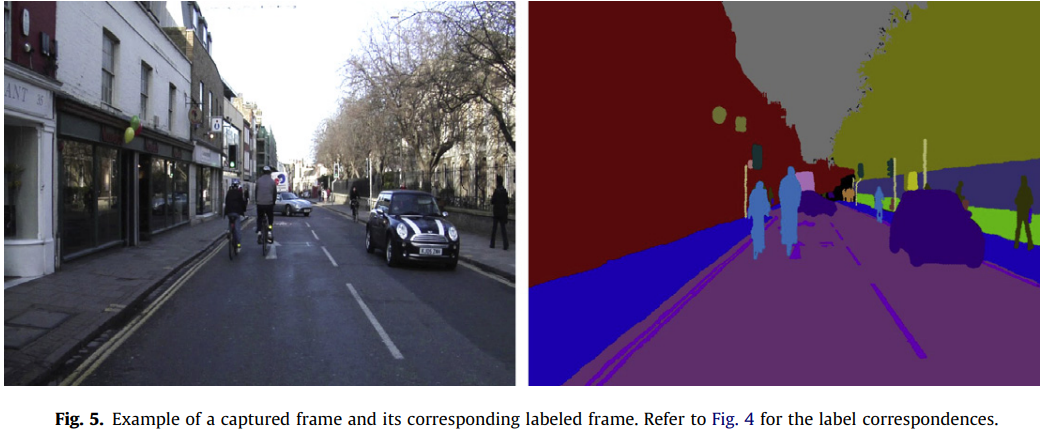

In [1]:
import torch
import fastai
from fastai.vision.all import *
import numpy as np

In [ ]:
path = untar_data(URLs.CAMVID_TINY)


# label getter function
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'

# dataloaders
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'),
                                              label_func= label_getter, codes=np.loadtxt(path/'codes.txt', dtype=str))
#  fine-tuning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,3.340232,2.638013,00:13


epoch,train_loss,valid_loss,time
0,2.057234,1.655495,00:05
1,1.676627,1.466134,00:04
2,1.472661,1.302511,00:04
3,1.329957,1.256630,00:04
4,1.204042,0.990345,00:04
5,1.080546,0.944130,00:04
6,0.981438,0.929824,00:04
7,0.899195,0.898520,00:04
8,0.824934,0.843409,00:04
9,0.761431,0.844058,00:05


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


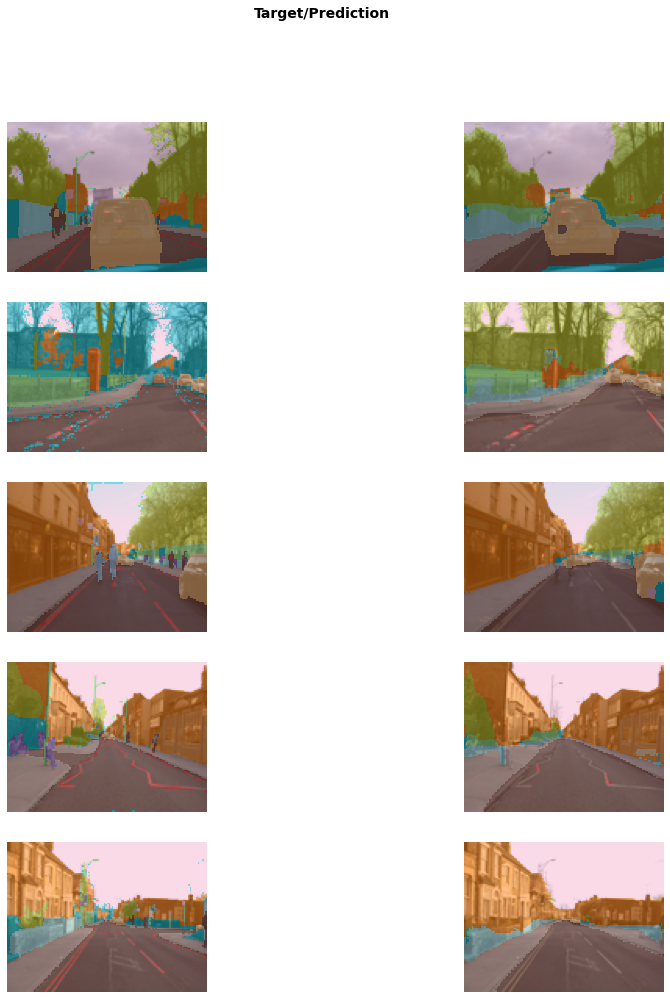

In [ ]:
learn.show_results(max_n=5, figsize=(15, 16))